In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

/home/iiser/.conda/envs/venv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


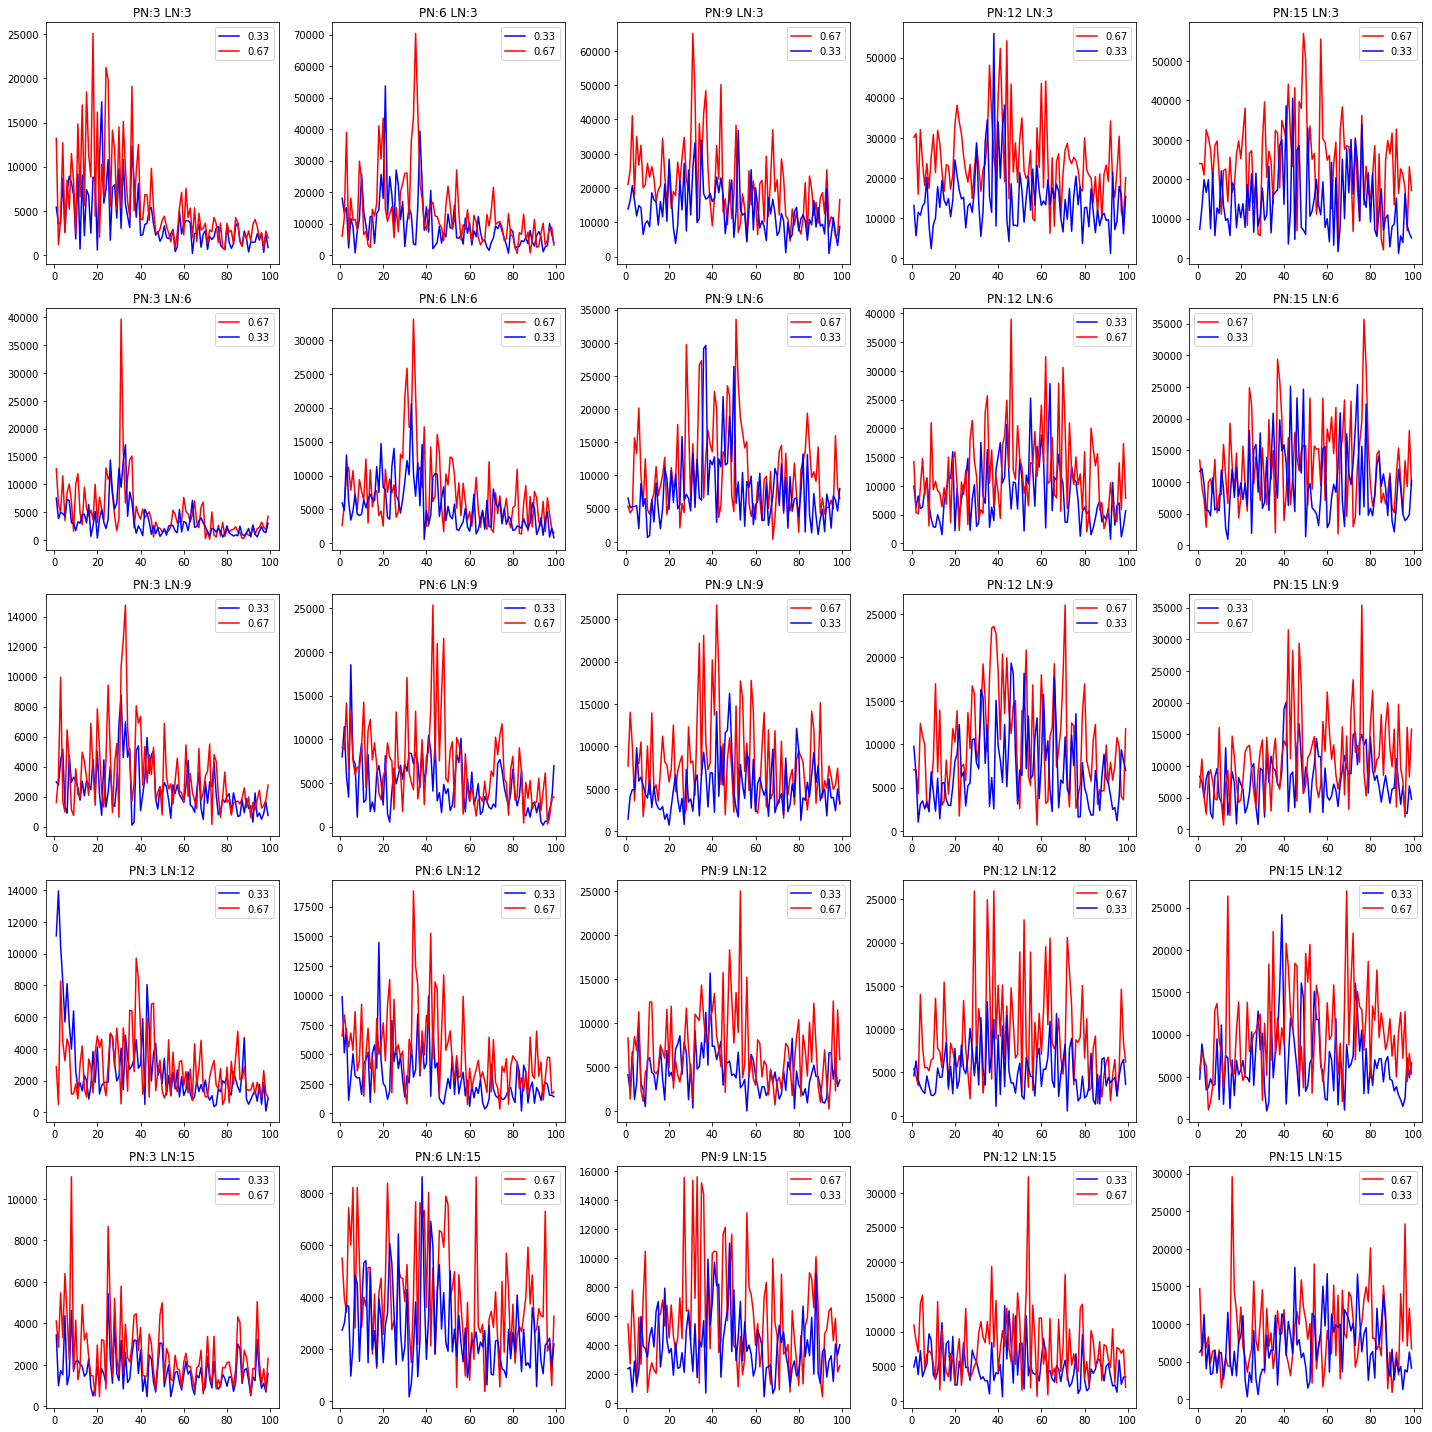

In [2]:
plt.figure(figsize=(20,20))
for i in filter(lambda v: ".npy" in v,os.listdir()):
    pn = int(int(i.split("_")[3])/3)
    ln = int(int(i.split("_")[5].split(".")[0])/3)-1
    p = i.split("_")[1]
    plt.subplot(5,5,pn+5*ln)
    file = np.load(i)
    t = np.arange(0,file.shape[0]*0.01,0.01)
    y = file[20000:120000,:90].mean(axis=1)
    Y = np.fft.fft(y)
    freq = np.fft.fftfreq(len(y), 0.01/1000)
    ind = np.logical_and(freq>0,freq<100)
    if p == "0.33":
        plt.plot(freq[ind], np.abs(Y)[ind],'b',label=p)
    else:
        plt.plot(freq[ind], np.abs(Y)[ind],'r',label=p)
    plt.title("PN:{} LN:{}".format(pn*3,(ln+1)*3))
    plt.legend()
plt.tight_layout()

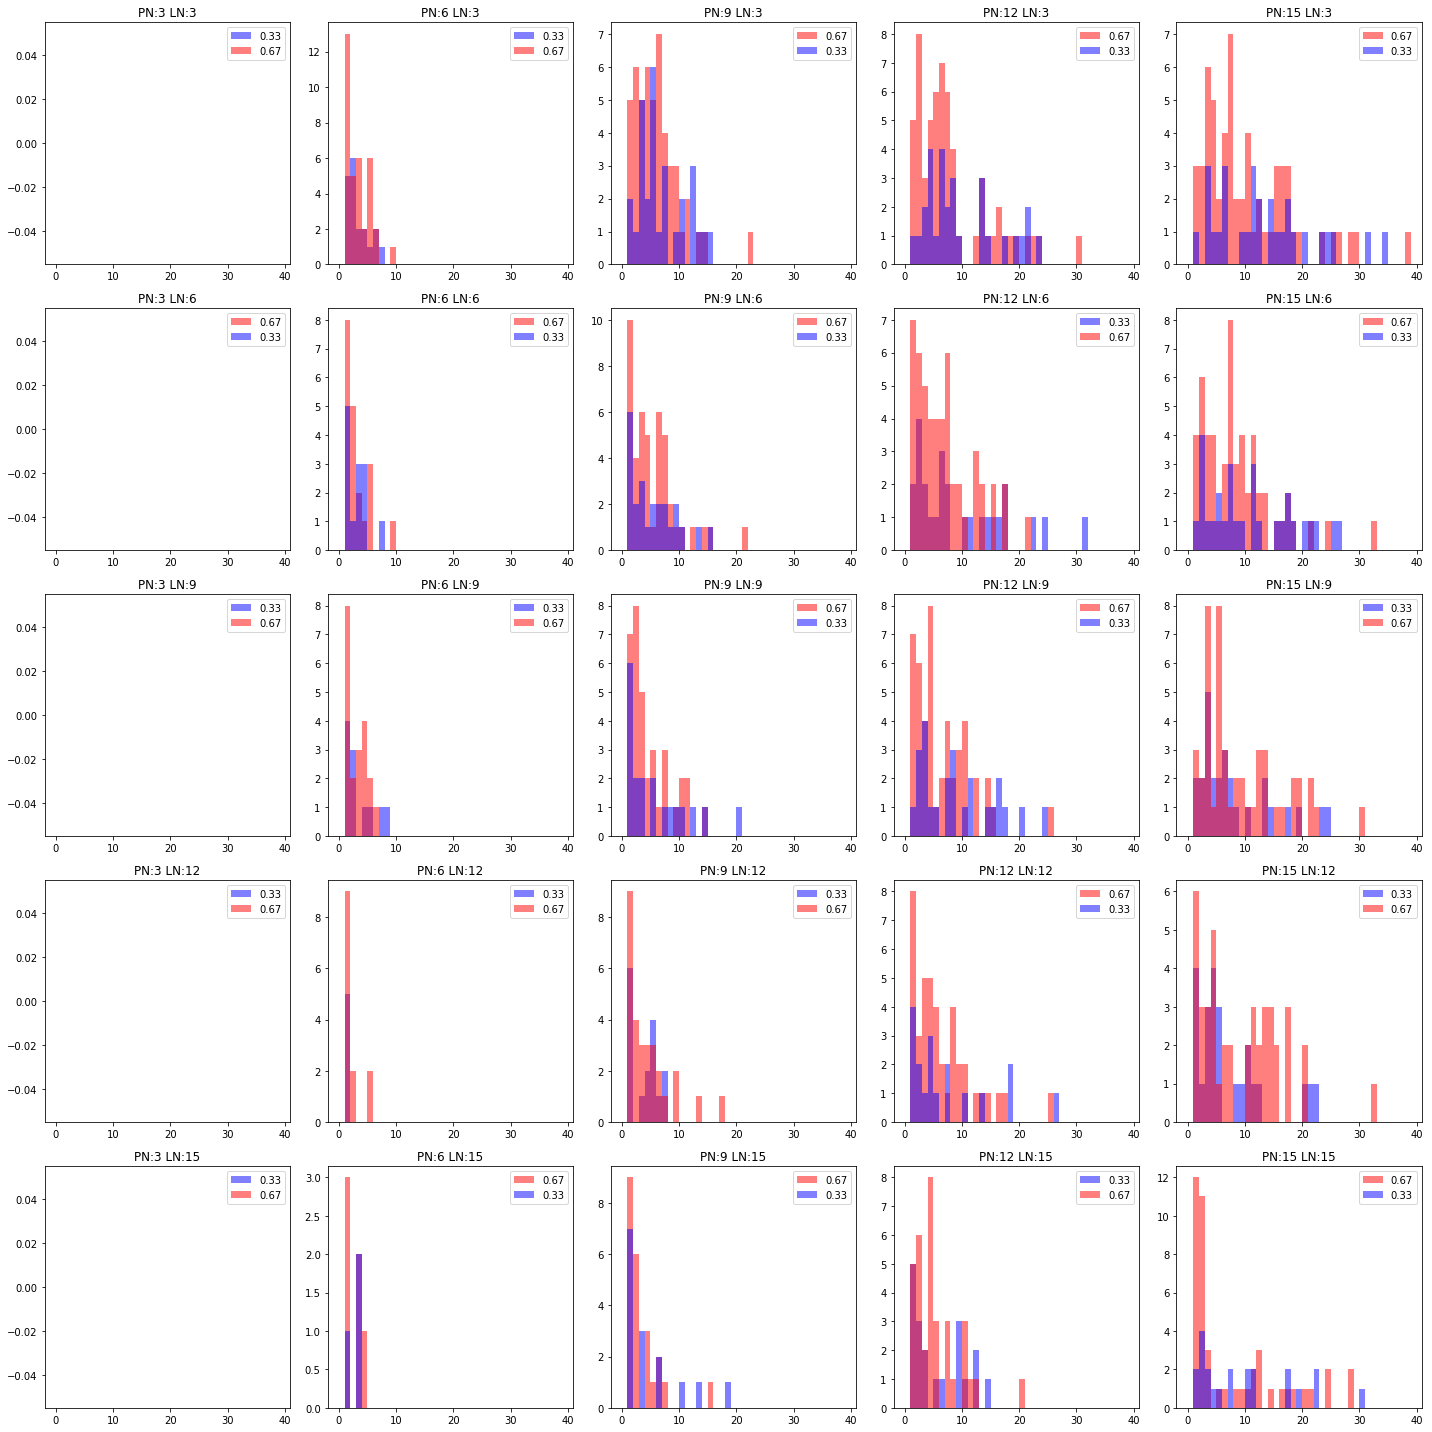

In [9]:
plt.figure(figsize=(20,20))
for i in filter(lambda v: ".npy" in v,os.listdir()):
    pn = int(int(i.split("_")[3])/3)
    ln = int(int(i.split("_")[5].split(".")[0])/3)-1
    p = i.split("_")[1]
    plt.subplot(5,5,pn+5*ln)
    file = np.load(i)
    
    pns = file[:,:90]
    spiking = np.logical_and(pns[:-1,:]<0,pns[1:,:]>0)
    spiking = np.sum(spiking,axis=0)
    if p == "0.33":
        plt.hist(spiking[spiking>0],bins=np.arange(0,40,1),alpha=0.5,color='b',label=p)
    else:
        plt.hist(spiking[spiking>0],bins=np.arange(0,40,1),alpha=0.5,color='r',label=p)
    plt.title("PN:{} LN:{}".format(pn*3,(ln+1)*3))
    plt.legend()
plt.tight_layout()

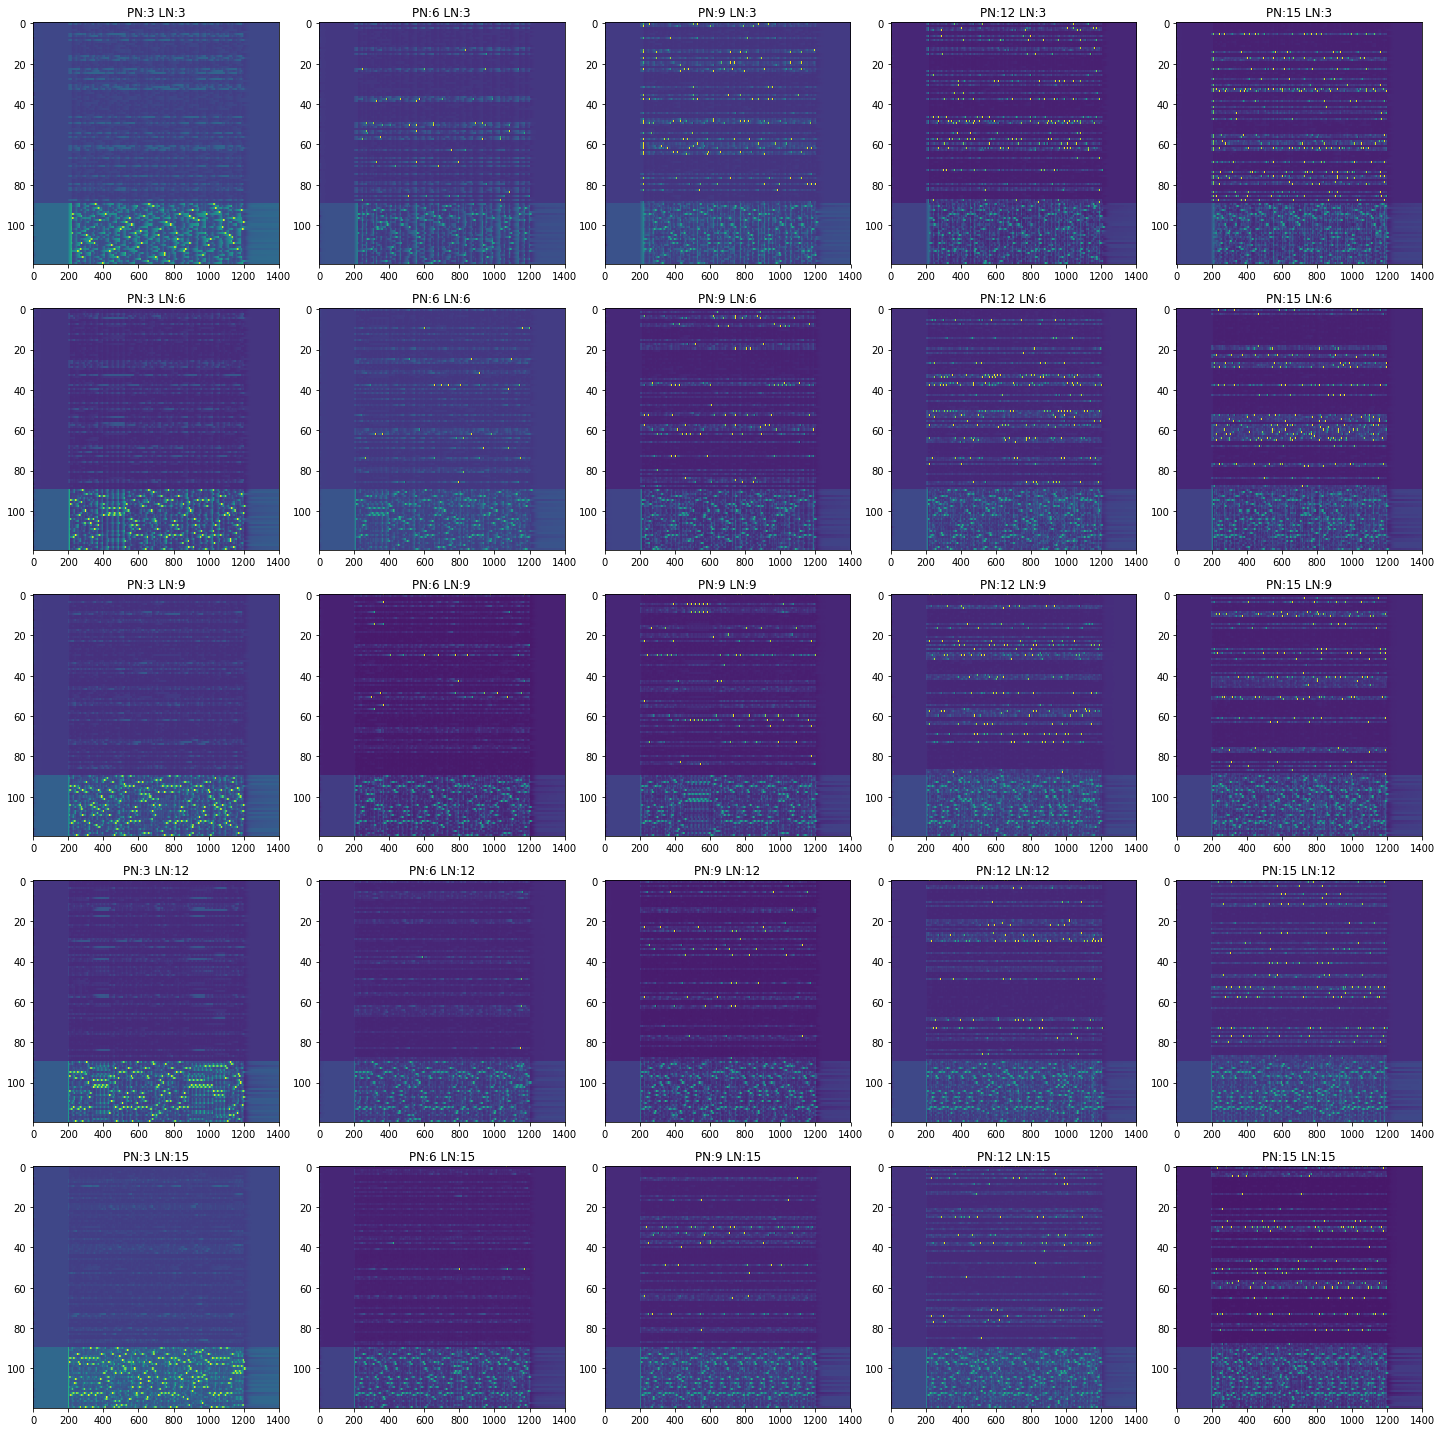

In [12]:
plt.figure(figsize=(20,25))
for i in filter(lambda v: ".npy" in v,os.listdir()):
    pn = int(int(i.split("_")[3])/3)
    ln = int(int(i.split("_")[5].split(".")[0])/3)-1
    p = i.split("_")[1]
    plt.subplot(5,5,pn+5*ln)
    file = np.load(i)
    if p == "0.33":
        plt.imshow(file[::100,:].T,aspect='auto')
    plt.title("PN:{} LN:{}".format(pn*3,(ln+1)*3))
plt.tight_layout()